In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
aa = pd.read_csv(url)
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [3]:
aa.head(2)

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5


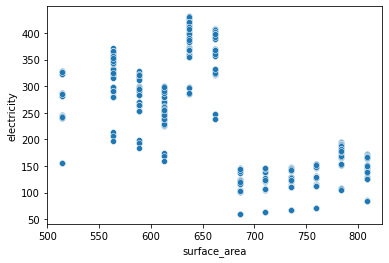

In [4]:
sns.scatterplot(aa['surface_area'], aa['electricity'])
plt.show()

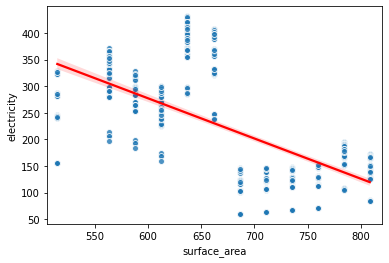

In [5]:
sns.regplot(x = 'surface_area', y = 'electricity', data = aa,
line_kws = {'color':'red'},
scatter_kws = {'edgecolor' : 'white'})
plt.xlim(505, 820)
plt.show()

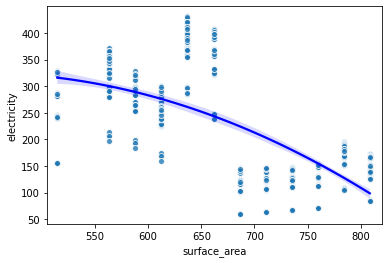

In [6]:
sns.regplot(x = 'surface_area', y = 'electricity', data = aa,
line_kws = {'color':'blue'},
scatter_kws = {'edgecolor' : 'white'},
order = 2)
plt.xlim(505, 820)
plt.show()

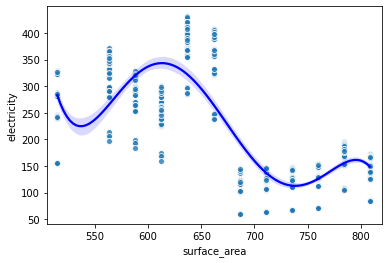

In [7]:
sns.regplot(x = 'surface_area', y = 'electricity', data = aa,
line_kws = {'color':'blue'},
scatter_kws = {'edgecolor' : 'white'},
order = 5)
plt.xlim(505, 820)
plt.show()

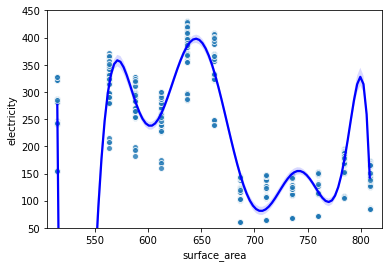

In [9]:
sns.regplot(x = 'surface_area', y = 'electricity', data = aa,
line_kws = {'color':'blue'},
scatter_kws = {'edgecolor' : 'white'},
order = 9)
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.show()

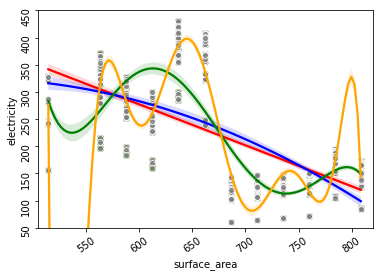

In [10]:
sns.regplot(x = 'surface_area', y = 'electricity',
data = aa,
line_kws = {'color':'red'})
sns.regplot(x = 'surface_area', y = 'electricity',
data = aa,
line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity',
data = aa,
line_kws = {'color':'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity',
data = aa,
line_kws = {'color':'orange'}, order = 9,
scatter_kws = {'color':'gray', 'edgecolor':'white'})
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

In [17]:
import numpy as np


In [12]:
X_train = aa[['surface_area']]
y_train = aa['electricity']
X_train.shape, y_train.shape

((768, 1), (768,))

In [13]:
from sklearn.linear_model import LinearRegression
Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(Model_1.coef_)
print(Model_1.intercept_)

[-0.75387157]
729.4538243006992


In [15]:
y_hat_1 = Model_1.predict(X_train)
len(y_hat_1)

768

In [18]:
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2)
TR_Err_1

5763.983779426347

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5 = poly.fit_transform(X_train)

In [20]:
PX_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [21]:
X_train.shape, PX_5.shape

((768, 1), (768, 5))

In [22]:
from sklearn.linear_model import LinearRegression
Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
np.set_printoptions(suppress = True, precision = 10)
print(Model_5.coef_)
print(Model_5.intercept_)

[-0.0003155148 -0.1029296835  0.0003787616 -0.0000005032  0.0000000002]
2906.221625380881


In [30]:
PX_5_pred = poly.fit_transform(X_train)
y_hat_5 = Model_5.predict(PX_5_pred)
y_hat_5.shape

(768,)

In [31]:
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2)
TR_Err_5

4177.726328606075

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)

In [33]:
from sklearn.linear_model import LinearRegression
Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]
-440.08258373871365


In [35]:
PX_9_pred = poly.fit_transform(X_train)
y_hat_9 = Model_9.predict(PX_9_pred)
y_hat_9.shape

(768,)

In [36]:
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2)
TR_Err_9

4086.7199908150374

In [37]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  5763.983779426347
5차 모델 :  4177.726328606075
9차 모델 :  4086.7199908150374


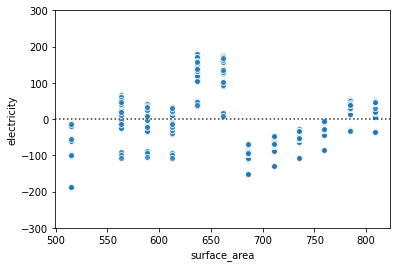

In [39]:
sns.residplot(x = 'surface_area',
y = 'electricity',
data = aa,
order = 1,
scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

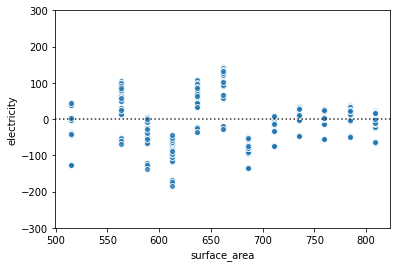

In [41]:
sns.residplot(x = 'surface_area',
y = 'electricity',
data = aa,
order = 5,
scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

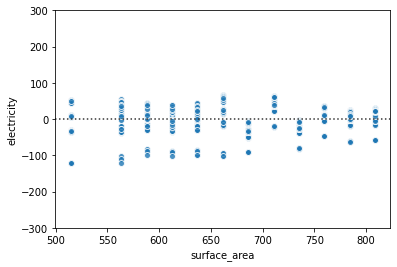

In [42]:
sns.residplot(x = 'surface_area',
y = 'electricity',
data = aa,
order = 9,
scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
TR_Elec, TE_Elec = train_test_split(aa, test_size = 0.2,
random_state = 2045)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(aa[['surface_area']],
aa['electricity'],
test_size = 0.2,
random_state = 2045)

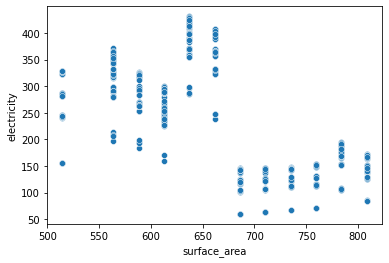

In [46]:
sns.scatterplot(TR_Elec['surface_area'], TR_Elec['electricity'])
plt.show()

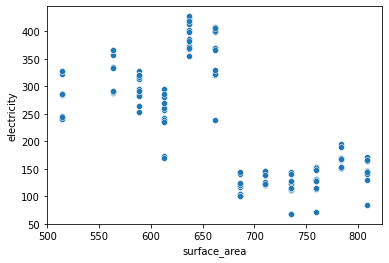

In [47]:
sns.scatterplot(TE_Elec['surface_area'], TE_Elec['electricity'])
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression
Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_hat_1 = Model_1.predict(X_test)
y_hat_1.shape

(154,)

In [50]:
from sklearn.metrics import mean_squared_error
TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.176547629271

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [52]:
from sklearn.linear_model import LinearRegression
Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
PX_5_TE = poly.fit_transform(X_test)
y_hat_5 = Model_5.predict(PX_5_TE)

In [54]:
from sklearn.metrics import mean_squared_error
TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4330.604566409499

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [56]:
from sklearn.linear_model import LinearRegression
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
PX_9_TE = poly.fit_transform(X_test)
y_hat_9 = Model_9.predict(PX_9_TE)

In [58]:
from sklearn.metrics import mean_squared_error
TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.689067137633

In [59]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6044.176547629271
5차 모델 :  4330.604566409499
9차 모델 :  4238.689067137633
